In [1]:
import xarray as xs
import matplotlib.pyplot as plt

### Data loading

In [2]:
ds = xs.load_dataset('/home/sangeetha/Work/Germany/bootcamp/data/steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc')

In [3]:
df = ds['lfp'].to_dataframe().reset_index()

## Processing

In [4]:
temp = df.reset_index()
aca = temp[temp.brain_area_lfp == 'ACA'][['trial','time','lfp']]
vis = temp[temp.brain_area_lfp == 'VISp'][['trial','time','lfp']]


## Plotting

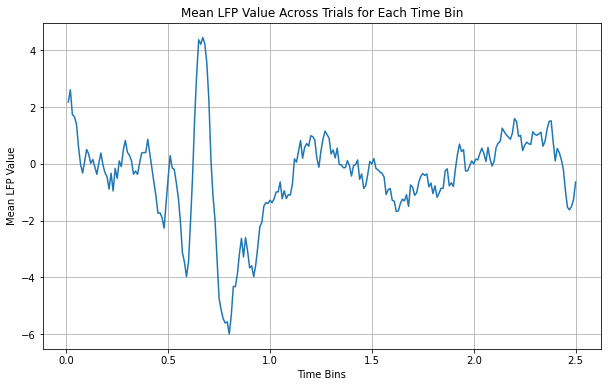

In [5]:
mean_lfp_values = df.groupby('time')['lfp'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_lfp_values.index, mean_lfp_values.values)
plt.title("Mean LFP Value Across Trials for Each Time Bin")
plt.xlabel("Time Bins")
plt.ylabel("Mean LFP Value")
plt.grid(True)

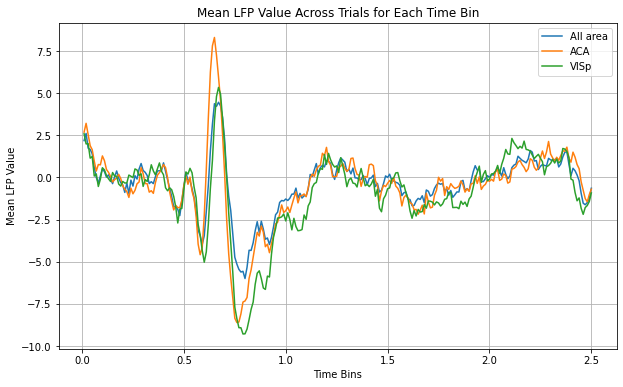

In [6]:
mean_lfp_values_aca = aca.groupby('time')['lfp'].mean()
mean_lfp_values_vis = vis.groupby('time')['lfp'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_lfp_values.index, mean_lfp_values.values, label='All area')
plt.plot(mean_lfp_values_aca.index, mean_lfp_values_aca.values, label='ACA')
plt.plot(mean_lfp_values_vis.index, mean_lfp_values_vis.values, label='VISp')

plt.title("Mean LFP Value Across Trials for Each Time Bin")
plt.xlabel("Time Bins")
plt.ylabel("Mean LFP Value")
plt.legend()
plt.grid(True)